In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from nltk import word_tokenize
import nltk
import re
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.svm import SVC
from sklearn.utils import resample

In [3]:
data = pd.read_csv("/content/data.csv")
data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [4]:
data.tail()

,Sentence,Sentiment
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral
5841,HELSINKI AFX - KCI Konecranes said it has won ...,positive


In [5]:
data.shape

(5842, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


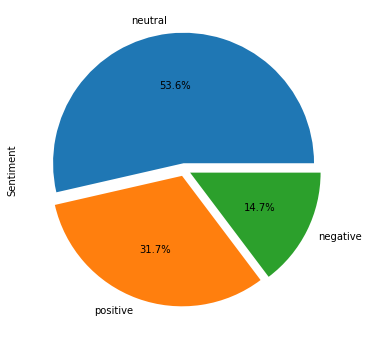

In [7]:
plt.figure(figsize=(13, 6))
data['Sentiment'].value_counts().plot(kind='pie', explode=[0.05,0.05, 0.05],  autopct='%1.1f%%')

In [8]:
data['Sentiment'].value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

Text Preprocessing 

In [9]:
ps = PorterStemmer()
def clean_text(text):
    lowered_text = text.lower()   
    removed_text = re.sub(r'[^a-zA-Z]',' ',lowered_text)  
    split_text = removed_text.split(' ')  
    stemmed_text = [ps.stem(word) for word in split_text if word not in stopwords.words('english')]  
    text = ' '.join(stemmed_text) 
    return text 

In [10]:
data['Sentence'] = data['Sentence'].apply(clean_text)
data.head()

,Sentence,Sentiment
0,geosolut technolog leverag benefon gp solut p...,positive
1,esi low bk real possibl,negative
2,last quarter componenta net sale doubl...,positive
3,accord finnish russian chamber commerc major...,neutral
4,swedish buyout firm sold remain percent s...,neutral


In [11]:
data.tail()

,Sentence,Sentiment
5837,rise cost forc packag produc huhtamaki axe ...,negative
5838,nordic walk first use summer train method cros...,neutral
5839,accord ship compani vike line eu decis signi...,neutral
5840,build home improv trade sale decreas ...,neutral
5841,helsinki afx kci konecran said order four ho...,positive


In [12]:
label_encoder = LabelEncoder()

def label_encoding(sent_col):
    data[sent_col]= label_encoder.fit_transform(data[sent_col])
    data[sent_col].unique()

label_encoding("Sentiment")
data.head()

,Sentence,Sentiment
0,geosolut technolog leverag benefon gp solut p...,2
1,esi low bk real possibl,0
2,last quarter componenta net sale doubl...,2
3,accord finnish russian chamber commerc major...,1
4,swedish buyout firm sold remain percent s...,1


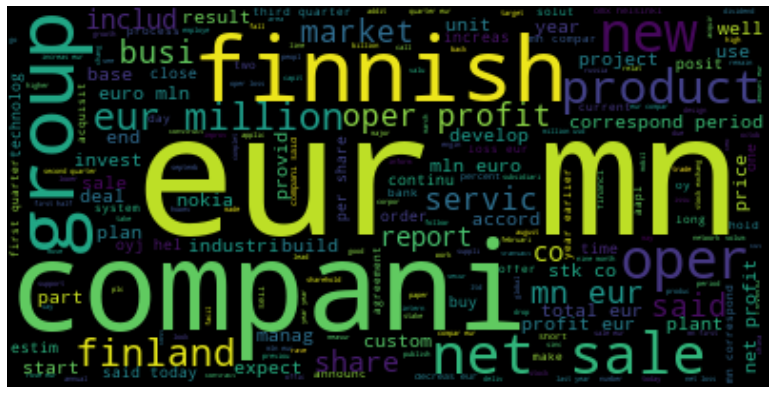

In [13]:
### generate word cloud
corpus = ' '.join(data['Sentence'])
plt.figure(figsize=(14,7))
word_cloud = WordCloud(background_color='black').generate(corpus)
plt.imshow(word_cloud, interpolation='bilinear') 
plt.axis("off")
plt.show()

In [14]:
data['Sentiment'].isna().sum()

0

In [15]:
#new_data['Sentiment'].fillna(new_data['Sentiment'].mode(), inplace=True)
#new_data['Sentiment'].isnull().sum()

Using Bag Of Words 

In [16]:
# Count Vectorizer 
cv = CountVectorizer(max_features = 1500,ngram_range=(1,3))
count_vect = cv.fit_transform(data['Sentence'])
new_data = pd.DataFrame(count_vect.toarray(), columns = cv.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
new_data['Sentiment'] = data['Sentiment']
new_data.head()

,aapl,ab,ab inbev,abl,abp,ac,ac million,access,accord,accord finnish,...,year earlier,year eur,year year,year year eur,yesterday,yet,yhoo,yit,zone,Sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
data_neg = new_data[(new_data['Sentiment']==0)] 
data_neu = new_data[(new_data['Sentiment']==1)]
data_pos = new_data[(new_data['Sentiment']==2)]

data_neg = resample(data_neg, 
                    replace=True,    
                    n_samples= 3130, 
                    random_state=42) 
 
data_pos = resample(data_pos, 
                    replace=True,    
                    n_samples= 3130, 
                    random_state=42)  

data_resampled = pd.concat([data_neg, data_pos, data_neu])

In [19]:
X = data_resampled.drop('Sentiment', axis =1).astype(int)
y = data_resampled['Sentiment'].astype(int)

In [20]:
print(X.shape)
print(y.shape)

(9390, 1500)
(9390,)


In [21]:
X_train , X_test, y_train, y_test = train_test_split(X , y,
                                                     test_size=0.30,
                                                     random_state=42,
                                                     stratify=y)

In [22]:
print("X_train shape: {} \ny_train shape: {}".format(X_train.shape, y_train.shape))
print("X_test shape: {} \ny_test shape: {}".format(X_test.shape, y_test.shape))

X_train shape: (6573, 1500) 
y_train shape: (6573,)
X_test shape: (2817, 1500) 
y_test shape: (2817,)


In [23]:
# Train a model
model = SVC(kernel='linear').fit(X_train, y_train)

# Make Predictions
predictor = model.predict(X_test)
print('Accuracy on test set:', round(accuracy_score(y_test, predictor), 2) * 100)

Accuracy on test set: 78.0
